In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from math import sqrt
import math

In [3]:
V=800*10**(-6)
sigmaV=5*10**(-6)
LS=15*100
sigmaLS=0.1*100
sigmaV=0.01*0.001
sigp=[981/2]*5
p=[40.5,81,118,158,202]
for i in range (len(p)):
    p[i]=p[i]*133.3
    sigp[i]=sigp[i]/p[i]
    p[i]=1/p[i]
    sigp[i]=sigp[i]*p[i]
p, sigp

([0.00018523149305844978,
  9.261574652922489e-05,
  6.357521583785776e-05,
  4.748022448650137e-05,
  3.7137997370629784e-05],
 [1.682940130313497e-05,
  4.2073503257837425e-06,
  1.9825068577612135e-06,
  1.1057693273300408e-06,
  6.765127312877938e-07])

In [4]:
D1=pd.read_csv('40.5.csv')
D1['V']=D1['V']*0.001
D2=pd.read_csv('80.9.csv')
D2['V']=D2['V']*0.001
D3=pd.read_csv('117.7.csv')
D3['V']=D3['V']*0.001
D4=pd.read_csv('158.2.csv')
D4['V']=D4['V']*0.001
D5=pd.read_csv('202.4.csv')
D5['V']=D5['V']*0.001
D5

,t,V
0,0.000,0.015197
1,1.000,0.015191
2,1.999,0.015184
3,2.999,0.015175
4,3.999,0.015172
...,...,...
801,800.999,0.010834
802,801.999,0.010830
803,803.000,0.010826
804,803.999,0.010823


In [5]:
D1['lnV']=np.log(D1['V'])
D2['lnV']=np.log(D2['V'])
D3['lnV']=np.log(D3['V'])
D4['lnV']=np.log(D4['V'])
D5['lnV']=np.log(D5['V'])

In [6]:
D1['sigmalnV']=sigmaV/D1['V']
D2['sigmalnV']=sigmaV/D2['V']
D3['sigmalnV']=sigmaV/D3['V']
D4['sigmalnV']=sigmaV/D4['V']
D5['sigmalnV']=sigmaV/D5['V']
D=[]
sigmaD=[]
D1

,t,V,lnV,sigmalnV
0,0.000,0.013406,-4.312075,0.000746
1,1.000,0.013384,-4.313680,0.000747
2,2.001,0.013362,-4.315310,0.000748
3,3.000,0.013340,-4.316966,0.000750
4,4.000,0.013317,-4.318721,0.000751
...,...,...,...,...
400,400.000,0.006837,-4.985348,0.001463
401,401.000,0.006827,-4.986943,0.001465
402,402.000,0.006816,-4.988541,0.001467
403,403.001,0.006805,-4.990068,0.001469


In [7]:
def line(x, a, b):
    return a * x + b 

params, cov = curve_fit(line, D1['t'], D1['lnV'], sigma=D1['sigmalnV'])
a=params[0]
sigmaa=(cov[0][0])**(1/2)
print(f"a = {params[0]:.6} \u00B1 {np.sqrt(cov[0][0]):.5}")
print(f"b = {params[1]:.6} \u00B1 {np.sqrt(cov[1][1]):.5}")

a = -0.00169293 ± 1.1461e-06
b = -4.31566 ± 0.0002211


In [8]:
d1=-(a*V*LS)/(2)
sigmad1=d1*((sigmaa/a)**2+(sigmaV/V)**2+(sigmaLS/LS)**2)**(1/2)
D.append(d1)
sigmaD.append(sigmad1)
d1, sigmad1

(0.001015760664635902, 1.4406363878424575e-05)

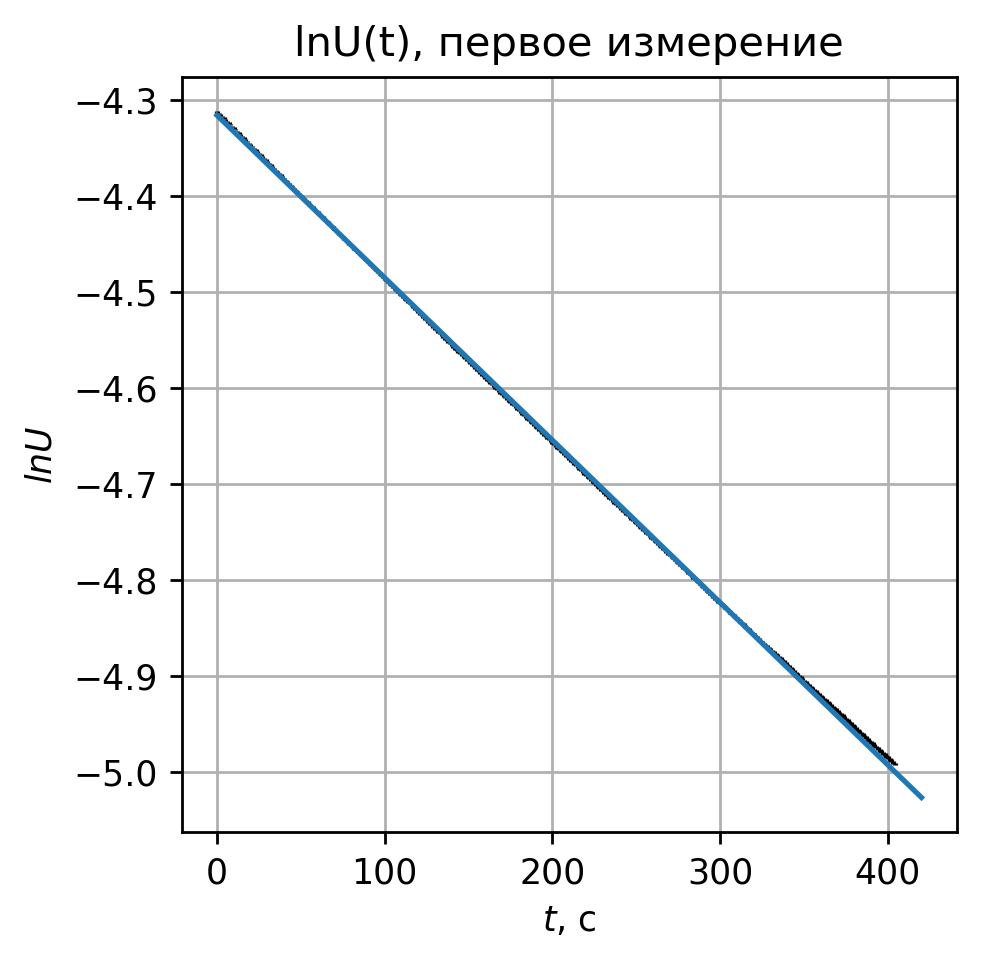

In [9]:
x=[D1['t'][0],420]
y=[]
for i in range(len(x)):
    y.append(-x[i]*0.00169293-4.31566)
plt.figure(figsize=(4,4), dpi=250)
plt.ylabel("$lnU$")
plt.xlabel("$t$, c")
plt.title('lnU(t), первое измерение')
plt.grid(True, linestyle="-")
plt.errorbar(D1['t'], D1['lnV'], yerr=D1['sigmalnV'], color = 'black', fmt='none')
plt.plot(x,y)

In [10]:
def line(x, a, b):
    return a * x + b 

params, cov = curve_fit(line, D2['t'], D2['lnV'], sigma=D2['sigmalnV'])
a=params[0]
sigmaa=(cov[0][0])**(1/2)
print(f"a = {params[0]:.6} \u00B1 {np.sqrt(cov[0][0]):.5}")
print(f"b = {params[1]:.6} \u00B1 {np.sqrt(cov[1][1]):.5}")

a = -0.000957816 ± 9.8132e-07
b = -4.15845 ± 0.00028176


In [11]:
d2=-(a*V*LS)/(2)
sigmad2=d2*((sigmaa/a)**2+(sigmaV/V)**2+(sigmaLS/LS)**2)**(1/2)
D.append(d2)
sigmaD.append(sigmad2)

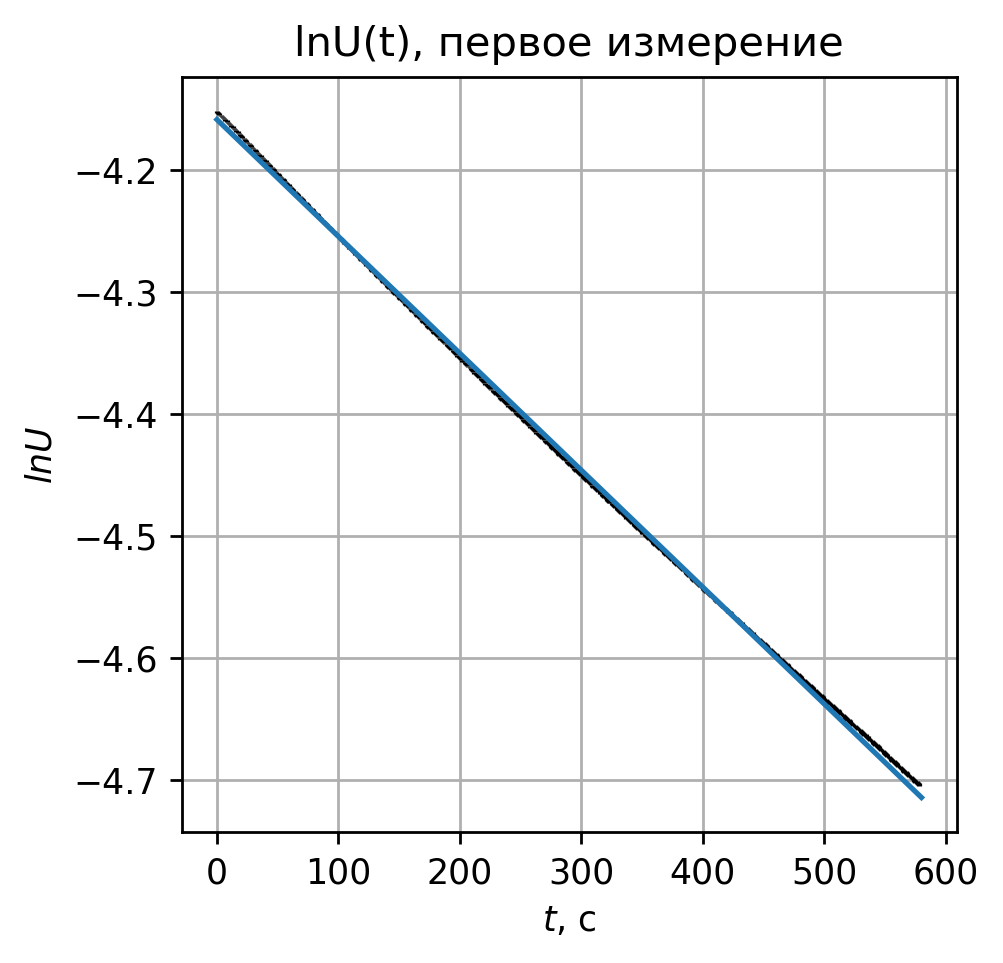

In [12]:
x=[D2['t'][0],580]
y=[]
for i in range(len(x)):
    y.append(-x[i]*0.000957816-4.15845)
plt.figure(figsize=(4,4), dpi=250)
plt.ylabel("$lnU$")
plt.xlabel("$t$, c")
plt.title('lnU(t), первое измерение')
plt.grid(True, linestyle="-")
plt.errorbar(D2['t'], D2['lnV'], yerr=D2['sigmalnV'], color = 'black', fmt='none')
plt.plot(x,y)

In [13]:
def line(x, a, b):
    return a * x + b 

params, cov = curve_fit(line, D3['t'], D3['lnV'], sigma=D3['sigmalnV'])
a=params[0]
sigmaa=(cov[0][0])**(1/2)
print(f"a = {params[0]:.6} \u00B1 {np.sqrt(cov[0][0]):.5}")
print(f"b = {params[1]:.6} \u00B1 {np.sqrt(cov[1][1]):.5}")

a = -0.000688131 ± 5.6537e-07
b = -4.24063 ± 0.00020882


In [14]:
d3=-(a*V*LS)/(2)
sigmad3=d3*((sigmaa/a)**2+(sigmaV/V)**2+(sigmaLS/LS)**2)**(1/2)
D.append(d3)
sigmaD.append(sigmad3)

In [15]:
def line(x, a, b):
    return a * x + b 

params, cov = curve_fit(line, D4['t'], D4['lnV'], sigma=D4['sigmalnV'])
a=params[0]
sigmaa=(cov[0][0])**(1/2)
print(f"a = {params[0]:.6} \u00B1 {np.sqrt(cov[0][0]):.5}")
print(f"b = {params[1]:.6} \u00B1 {np.sqrt(cov[1][1]):.5}")

a = -0.000498989 ± 6.4868e-07
b = -4.16449 ± 0.00028111


In [16]:
d4=-(a*V*LS)/(2)
sigmad4=d4*((sigmaa/a)**2+(sigmaV/V)**2+(sigmaLS/LS)**2)**(1/2)
D.append(d4)
sigmaD.append(sigmad4)

In [17]:
d4

0.0002993933839787625

In [18]:
def line(x, a, b):
    return a * x + b 

params, cov = curve_fit(line, D5['t'], D5['lnV'], sigma=D5['sigmalnV'])
a=params[0]
sigmaa=(cov[0][0])**(1/2)
print(f"a = {params[0]:.6} \u00B1 {np.sqrt(cov[0][0]):.5}")
print(f"b = {params[1]:.6} \u00B1 {np.sqrt(cov[1][1]):.5}")

a = -0.000420441 ± 7.7156e-07
b = -4.19784 ± 0.00032832


In [19]:
d5=-(a*V*LS)/(2)
sigmad5=d5*((sigmaa/a)**2+(sigmaV/V)**2+(sigmaLS/LS)**2)**(1/2)
D.append(d5)
sigmaD.append(sigmad5)
d5

0.0002522646642798577

<ErrorbarContainer object of 3 artists>

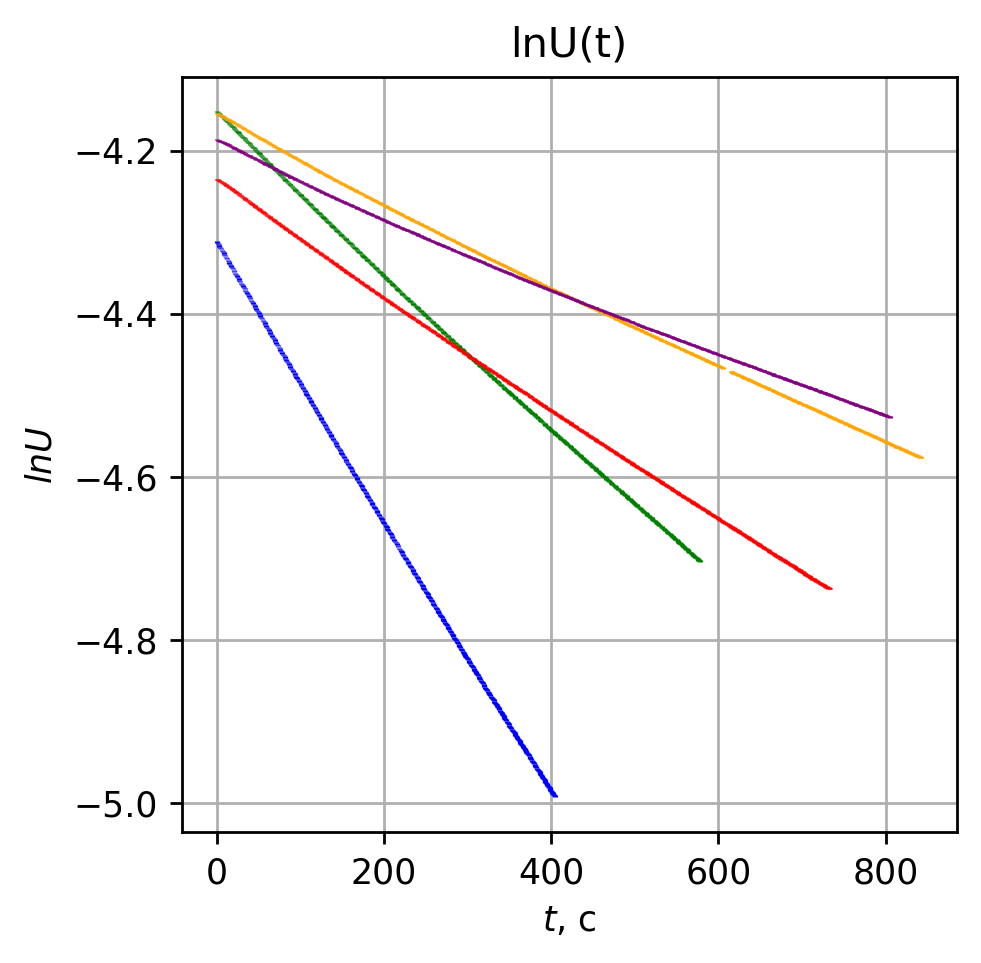

In [20]:
plt.figure(figsize=(4,4), dpi=250)
plt.ylabel("$lnU$")
plt.xlabel("$t$, c")
plt.title('lnU(t)')
plt.grid(True, linestyle="-")
plt.errorbar(D1['t'], D1['lnV'], yerr=D1['sigmalnV'], color = 'blue', fmt='none')
plt.errorbar(D2['t'], D2['lnV'], yerr=D2['sigmalnV'], color = 'green', fmt='none')
plt.errorbar(D3['t'], D3['lnV'], yerr=D3['sigmalnV'], color = 'red', fmt='none')
plt.errorbar(D4['t'], D4['lnV'], yerr=D4['sigmalnV'], color = 'orange', fmt='none')
plt.errorbar(D5['t'], D5['lnV'], yerr=D5['sigmalnV'], color = 'purple', fmt='none')

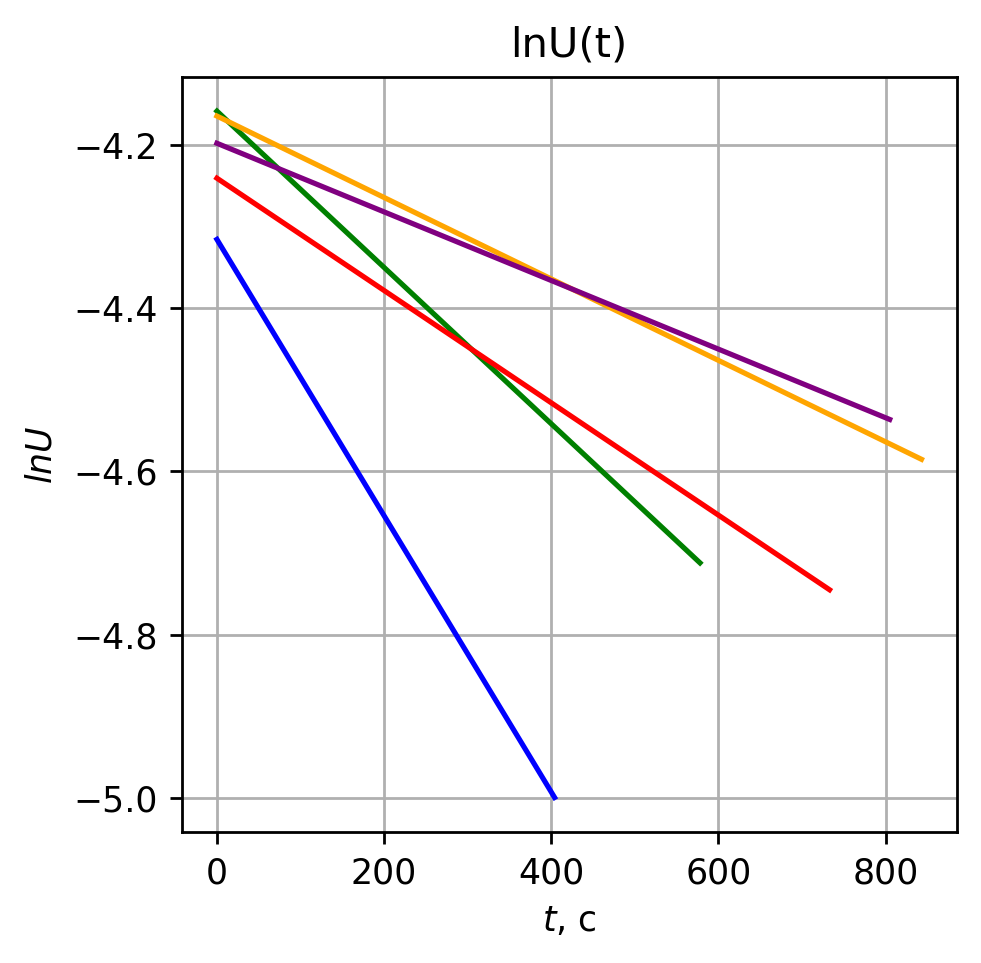

In [21]:
x1=[D1['t'][0],404]
x2=[D1['t'][0],578]
x3=[D1['t'][0],733]
x4=[D1['t'][0],843]
x5=[D1['t'][0],805]
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
for i in range(len(x)):
    y1.append(-x1[i]*0.00169293-4.31566)
    y2.append(-x2[i]*0.000957816-4.15845)
    y3.append(-x3[i]*0.000688131-4.24063)
    y4.append(-x4[i]*0.000498989-4.16449)
    y5.append(-x5[i]*0.000420441-4.19784)
plt.figure(figsize=(4,4), dpi=250)
plt.ylabel("$lnU$")
plt.xlabel("$t$, c")
plt.title('lnU(t)')
plt.grid(True, linestyle="-")
plt.plot(x1,y1, color='blue')
plt.plot(x2,y2,color='green')
plt.plot(x3,y3,color='red')
plt.plot(x4,y4,color='orange')
plt.plot(x5,y5,color='purple')

In [22]:
D, sigmaD

([0.001015760664635902,
  0.0005746898860399138,
  0.00041287845236851134,
  0.0002993933839787625,
  0.0002522646642798577],
 [1.4406363878424575e-05,
  8.162703305245396e-06,
  5.858939772951101e-06,
  4.259226552341574e-06,
  3.6036082692686203e-06])

In [23]:
DD=pd.DataFrame({'D':D, 'sigmaD':sigmaD, '1P':p, 'sigma1P':sigp})
DD

,D,sigmaD,1P,sigma1P
0,0.001016,0.000014,0.000185,1.682940e-05
1,0.000575,0.000008,0.000093,4.207350e-06
2,0.000413,0.000006,0.000064,1.982507e-06
3,0.000299,0.000004,0.000047,1.105769e-06
4,0.000252,0.000004,0.000037,6.765127e-07


In [24]:
def line(x, a, b):
    return a * x + b 

params, cov = curve_fit(line, DD['1P'], DD['D'], sigma=DD['sigma1P'])
a=params[0]
b=params[1]
sigmaa=(cov[0][0])**(1/2)
print(f"a = {params[0]:.6} \u00B1 {np.sqrt(cov[0][0]):.5}")
print(f"b = {params[1]:.6} \u00B1 {np.sqrt(cov[1][1]):.5}")

a = 5.66148 ± 0.34795
b = 4.00936e-05 ± 1.5392e-05


In [29]:
Dn=a*(1/101325)
part1=(sigmaa/a)*(1/101325)*a
sigmaDn=(part1**2)**(1/2)
Dn, sigmaDn, sigmaDn/Dn*100

(5.587446033779982e-05, 3.4339902625771137e-06, 6.145903229876877)

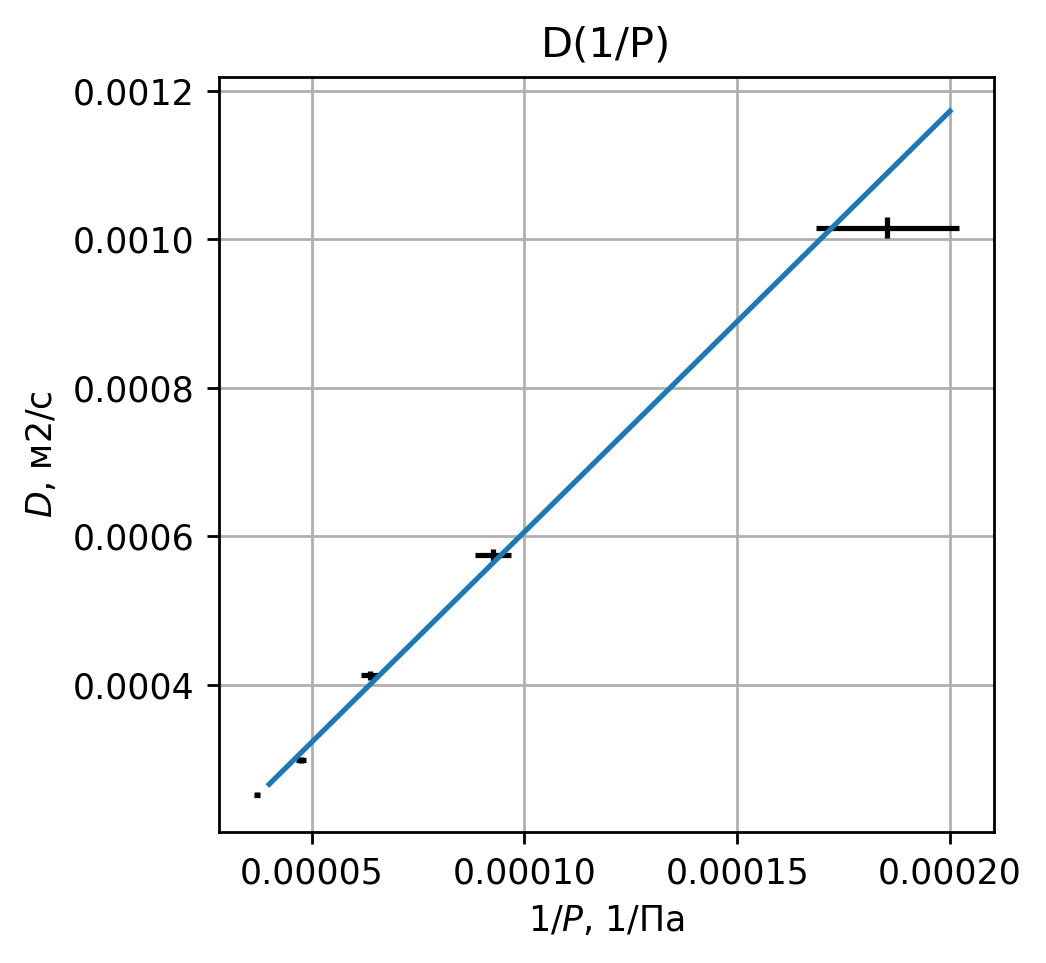

In [26]:
x=[0.00004, 0.0002]
y=[]
for i in range (2):
    y.append(x[i]*5.66148+4.00936e-05)
plt.figure(figsize=(4,4), dpi=250)
plt.ylabel("$D$, м2/с")
plt.xlabel("$1/P$, 1/Па")
plt.title('D(1/P)')
plt.grid(True, linestyle="-")
plt.errorbar(DD['1P'], DD['D'], xerr=DD['sigma1P'] , yerr=DD['sigmaD'], color = 'black', fmt='none')
plt.plot(x,y)

In [27]:
u=((8*8.31*300)/(math.pi*0.004))**(1/2)
lambd=3*Dn/u
lambd

1.330556728569154e-07

In [28]:
((3*9*Dn**2*0.004)/(4*8*101325*lambd**2*6.02*10**(23)))**(1/3)

2.1368474645108946e-09